# ANÁLISIS DE VENTAS DE VIDEO JUEGOS

### Para iniciar el proceso de visualización de la data, se realizan las siguientes importaciones de librerías de python:

In [3]:
!pip install xlrd
!pip install openpyxl
!pip install circlify
!pip install pywaffle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import circlify
import plotly.express as px
import numpy as np


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Se obtiene la siguiente información general sobre las ventas de los diferentes tipos de video juegos a nivel mundial:

In [4]:
dfGames = pd.read_excel('/work/ProyectoSeguridadDatos_VentasGames/Ventas_Videojuegos.xlsx')
dfGames

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


## Transformación de datos:

Se agrega una nueva columna que distribuya los diferentes años involucrados en la información, tranformandolos en una nueva columna categorica de rango de años:

In [5]:
# Definimos donde se van a "cortar" los rangos, se deben incluir el mínimo y el máximo
rangos = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

# Definimos las etiquetas, la longitud de la lista es de rangos - 1
etiquetas = ['De 1980 a 1985',
             'De 1986 a 1990',
             'De 1991 a 1995',
             'De 1996 a 2000',
             'De 2001 a 2005',
             'De 2006 a 2010',
             'De 2011 a 2015',
             'De 2016 a 2020']

# Creamos una nueva columna con el nombre de las etiquetas
dfGames['Rango Año'] = pd.cut(dfGames['Año'], rangos, labels = etiquetas, include_lowest = True)

dfGames


,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global,Rango Año
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,De 2006 a 2010
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,De 1980 a 1985
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,De 2006 a 2010
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,De 2006 a 2010
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,De 1996 a 2000
...,...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,De 2016 a 2020
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,De 2016 a 2020
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01,De 2016 a 2020
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,De 2016 a 2020


Se transforma el tipo de dato del Año a una cadena string para su posterior manipulación:

In [6]:
dfGames['Año'] = dfGames['Año'].astype(str)
dfGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Nombre         16326 non-null  object  
 1   Plataforma     16326 non-null  object  
 2   Año            16326 non-null  object  
 3   Genero         16326 non-null  object  
 4   Editorial      16290 non-null  object  
 5   Ventas NA      16326 non-null  float64 
 6   Ventas EU      16326 non-null  float64 
 7   Ventas JP      16326 non-null  float64 
 8   Ventas Otros   16326 non-null  float64 
 9   Ventas Global  16326 non-null  float64 
 10  Rango Año      16326 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.3+ MB


## Visualización de Datos

### Ventas Globales Por Genero de Video Juego:

Se crea una tabla que contiene las ventas globales de los video juegos por Genero:

In [7]:
dfVentaXGen = dfGames.groupby(['Genero']).agg(
                                  {'Ventas Global': 'sum'
                                  }).reset_index()

dfVentaXGen

,Genero,Ventas Global
0,Action,1722.88
1,Adventure,234.80
2,Fighting,444.05
3,Misc,797.62
4,Platform,829.15
5,Puzzle,242.22
6,Racing,726.77
7,Role-Playing,923.84
8,Shooter,1026.20
9,Simulation,389.87


In [8]:
dfLstGenero = dfVentaXGen['Genero']
list_Genero = dfLstGenero.tolist()

#Obtener una lista de colores, el nombre de la paleta se puede cambiar
pal_ = list(sns.color_palette(palette='viridis_r',
                              n_colors=len(list_Genero)).as_hex())

Luego de la recuperación de ventas por genero, se realiza una validación porcentual donde se puede visualizar las cantidades de ventas por genero.

Se puede observar que, el genero "Action" es el que mayor cantidad de ventas tiene con un porcentaje del 19,5%, a diferencia del genero "Strategy" que cuenta con la menor cantidad de ventas con un 1,97%.

In [9]:
fig = px.pie(dfVentaXGen, values='Ventas Global', names='Genero',
             color_discrete_sequence=pal_)
fig.update_layout(width = 700, height = 500,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.update_traces(textfont_size=10)
fig.show()

Por otra parte, se espera realizar una comparación de ventas por zona; para lo cual, se crea una tabla nueva con la información requerida:

In [10]:
dfVentaDetXGen = dfGames.groupby(['Genero']).agg(
                                  {'Ventas NA': 'sum'
                                  ,
                                  'Ventas EU': 'sum'
                                  ,
                                  'Ventas JP': 'sum'
                                  ,
                                  'Ventas Otros': 'sum'
                                  }).reset_index()

dfVentaDetXGen

,Genero,Ventas NA,Ventas EU,Ventas JP,Ventas Otros
0,Action,861.80,516.48,158.66,184.92
1,Adventure,102.06,63.79,52.01,16.70
2,Fighting,220.74,100.00,87.15,36.19
3,Misc,402.48,213.82,106.67,74.02
4,Platform,445.99,200.67,130.65,51.51
5,Puzzle,122.01,50.53,56.68,12.47
6,Racing,356.93,236.32,56.62,76.68
7,Role-Playing,326.50,187.58,350.29,59.38
8,Shooter,575.16,310.45,38.18,101.90
9,Simulation,181.51,113.20,63.54,31.34


In [11]:
dfVentaDetXGen = dfVentaDetXGen.set_index('Genero')

In [12]:
dfLstVentasNA = dfVentaDetXGen['Ventas NA']
list_VentasNA = dfLstVentasNA.tolist()

dfLstVentasEU = dfVentaDetXGen['Ventas EU']
list_VentasEU = dfLstVentasEU.tolist()

dfLstVentasJP = dfVentaDetXGen['Ventas JP']
list_VentasJP = dfLstVentasJP.tolist()

dfLstVentasO = dfVentaDetXGen['Ventas Otros']
list_VentasO = dfLstVentasO.tolist()

#from operator import length_hint
#length_hint(list_VentasO)

In [13]:
c = []

def SumarLista(a,b):
  c = []
  for i in range(len(a)):
    #print(i)
    for y in range(len(b)):
        #print(y)
        x = a[i]+b[i]
        c.append(x)
        break

  return c

a = SumarLista(list_VentasO,list_VentasJP)
b = SumarLista(a,list_VentasEU)

En la visualización, se puede observar que las ventas a otra zonas tiende a ser menor que las zonas definidas. Adicionalmente, se puede observar que, las ventas a Norte América dejan una mayor ganancia por mucho a las ventas de Japon y Europa, en especial con el genero de video juego "Action"  y continuando con "Sports".

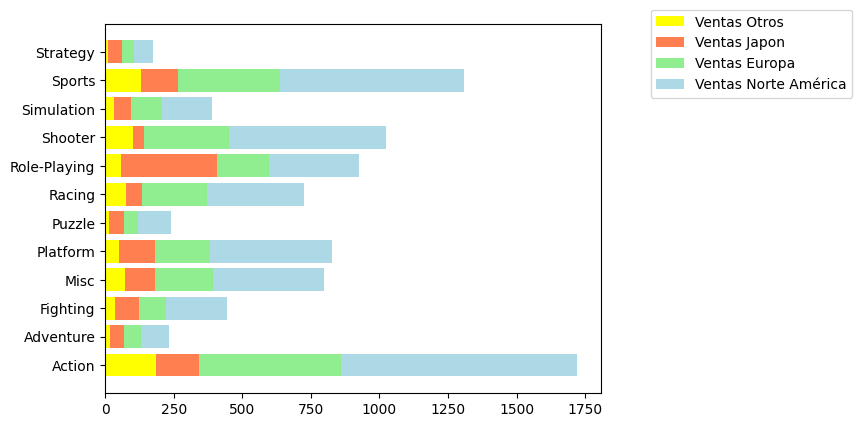

In [14]:
fig, ax = plt.subplots()

ax.barh(list_Genero, list_VentasO, label = "Ventas Otros", color = "yellow")
ax.barh(list_Genero, list_VentasJP, left = list_VentasO, label = "Ventas Japon", color = "coral")
ax.barh(list_Genero, list_VentasEU, left = a, label = "Ventas Europa", color = "lightgreen")
ax.barh(list_Genero, list_VentasNA, left = b, label = "Ventas Norte América", color = "lightblue")

ax.legend(loc = (1.1, 0.8))
plt.show()

## Ventas Por Año:

Se busca analizar las ventas globales por rango de años, para ello se obtiene la siguiente información:

In [15]:
dfVentaXAño = dfGames.groupby(['Rango Año']).agg(
                                  {'Ventas Global': 'sum'
                                  }).reset_index()

dfVentaXAño

,Rango Año,Ventas Global
0,De 1980 a 1985,197.10
1,De 1986 a 1990,228.87
2,De 1991 a 1995,321.65
3,De 1996 a 2000,1109.43
4,De 2001 a 2005,1964.09
5,De 2006 a 2010,3078.82
6,De 2011 a 2015,1849.13
7,De 2016 a 2020,70.98


In [16]:
dfVentaXAño = dfVentaXAño.set_index('Rango Año')

En la siguiente visualización, se puede observar que las ventas tienen una mayor concentración en un rango de años de 2006 a 2010 con un aproxiado de ganancias de 3000 USD, a diferencia del rango de años del 2016 a 2020 donde se puede diferir que las ventas tuvieron una gran disminución:

<AxesSubplot: ylabel='Rango Año'>

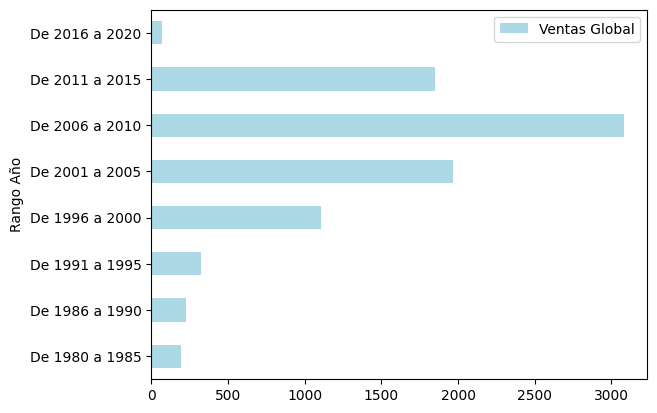

In [17]:
dfVentaXAño.plot(kind = 'barh',
                 stacked = 'True',
                 color = 'lightblue')

## Ventas Por Plataforma:

Se busca visualizar la cantidad de ventas por plataforma de video juegos, para lo cual se obtiene la siguiente información:

In [18]:
dfVentaPlat = dfGames.groupby(['Plataforma']).agg(
                                  {'Ventas Global': 'sum'
                                  }).reset_index()

dfVentaPlat

,Plataforma,Ventas Global
0,2600,86.57
1,3DO,0.10
2,3DS,246.28
3,DC,15.97
4,DS,818.67
5,GB,254.42
6,GBA,313.56
7,GC,197.14
8,GEN,28.36
9,GG,0.04


In [19]:
dfLstPlataforma = dfVentaPlat['Plataforma']
list_Plataforma = dfLstPlataforma.tolist()
dfVentaPlat = dfVentaPlat.set_index('Plataforma')

Según los datos, se puede decir que la plataforma PS es preferencia de los usuario, ya que cuenta con un aproximado de 1200 ventas a comparación de las demas, dejando como última instancia a la plataforma "2600":

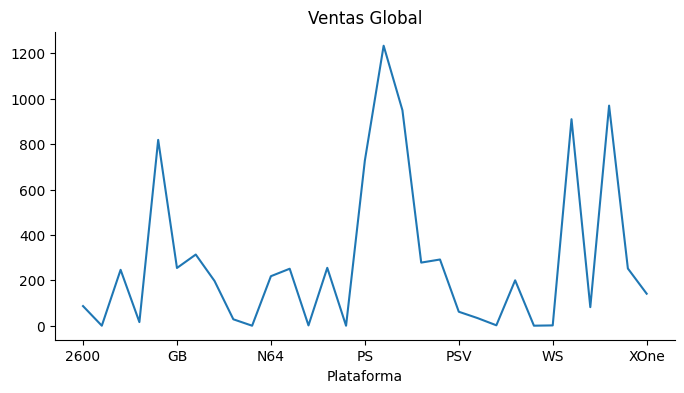

In [20]:
dfVentaPlat['Ventas Global'].plot(kind='line', figsize=(8, 4), title='Ventas Global')
plt.gca().spines[['top', 'right']].set_visible(False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=678e154f-5868-43ea-8bd7-72bdaba54889' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>